In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import pickle

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

In [3]:
with open('/Users/robertpagano/src/metis_project_luther/first_regression_data.pickle', "rb") as to_read:
    df = pickle.load(to_read)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12148 entries, 6 to 24292
Data columns (total 7 columns):
Attendance           12098 non-null float64
Rank                 12148 non-null int64
GB                   12148 non-null float64
is_night             12148 non-null int64
Wins_last_10         11473 non-null float64
Mean_runs_last_10    12148 non-null float64
run_differential     12148 non-null int64
dtypes: float64(4), int64(3)
memory usage: 759.2 KB


In [5]:
df.dropna(subset=['Attendance'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12098 entries, 6 to 24292
Data columns (total 7 columns):
Attendance           12098 non-null float64
Rank                 12098 non-null int64
GB                   12098 non-null float64
is_night             12098 non-null int64
Wins_last_10         11424 non-null float64
Mean_runs_last_10    12098 non-null float64
run_differential     12098 non-null int64
dtypes: float64(4), int64(3)
memory usage: 756.1 KB


In [6]:
corr = df.corr()

In [7]:
corr

,Attendance,Rank,GB,is_night,Wins_last_10,Mean_runs_last_10,run_differential
Attendance,1.000000,-0.329299,-0.281755,-0.122947,0.181609,0.089962,0.347547
Rank,-0.329299,1.000000,0.713233,0.009204,-0.449086,-0.237737,-0.708257
GB,-0.281755,0.713233,1.000000,0.031620,-0.386061,-0.155553,-0.767030
is_night,-0.122947,0.009204,0.031620,1.000000,-0.024977,-0.017390,-0.021884
Wins_last_10,0.181609,-0.449086,-0.386061,-0.024977,1.000000,0.536993,0.414356
Mean_runs_last_10,0.089962,-0.237737,-0.155553,-0.017390,0.536993,1.000000,0.259060
run_differential,0.347547,-0.708257,-0.767030,-0.021884,0.414356,0.259060,1.000000


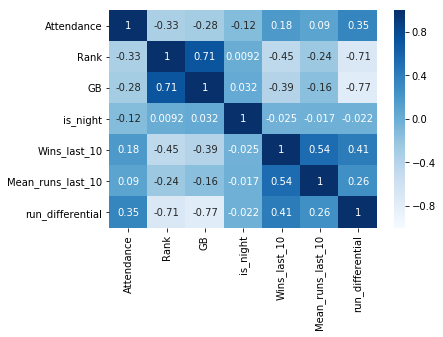

In [8]:
sns.heatmap(corr, cmap="Blues", annot=True, vmin=-1, vmax=1);

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


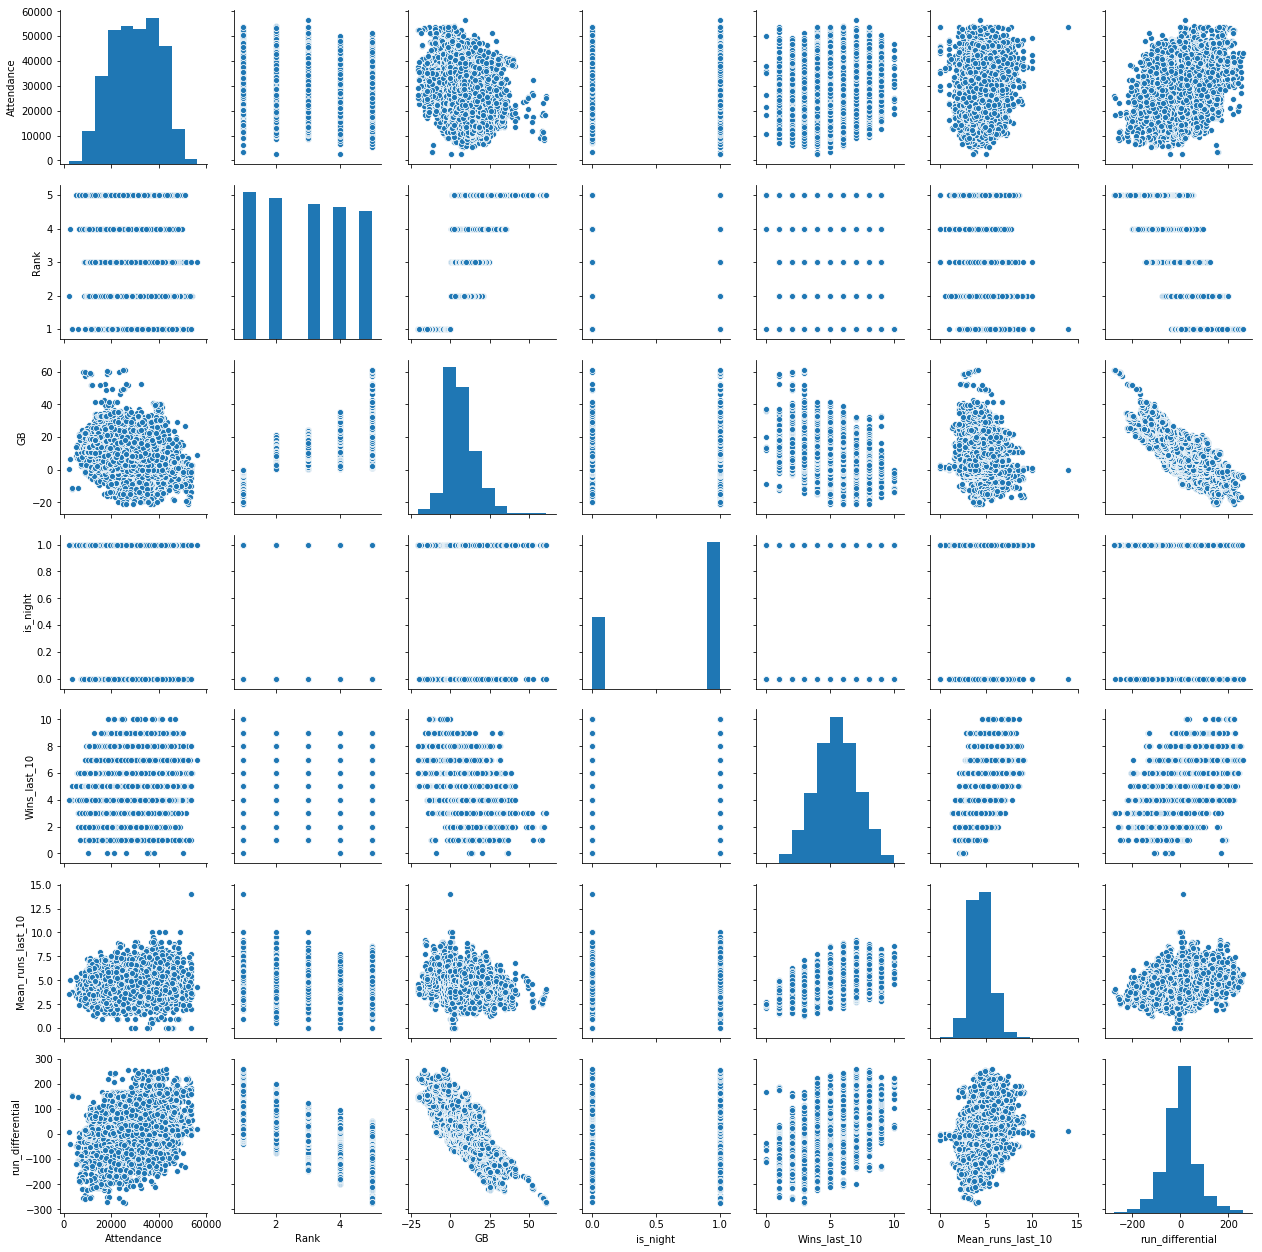

In [9]:
sns.pairplot(df);

In [10]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('Attendance ~ Rank + GB + is_night + Wins_last_10 + Mean_runs_last_10 + run_differential', data=df, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Attendance   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     358.1
Date:                Tue, 22 Jan 2019   Prob (F-statistic):               0.00
Time:                        19:15:29   Log-Likelihood:            -1.2030e+05
No. Observations:               11424   AIC:                         2.406e+05
Df Residuals:                   11417   BIC:                         2.407e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          3.543e+04    515.986     68.666      0.000    3.44e+04    3.64e+04
Rank              -1350.1819     96.198    -14.035      0.000   -1538.747   -1161.617
GB                   51.2095     15.615      3.280      0.001      20.602      81.817
is_night          -2374.9819    181.566    -13.081      0.000   -2730.882   -2019.081
Wins_last_10         78.6909     65.721      1.197      0.231     -50.133     207.515
Mean_runs_last_10  -136.3903     94.140     -1.449      0.147    -320.921      48.141
run_differential     36.4198      2.132     17.082      0.000      32.241      40.599
==============================================================================
Omnibus:                      381.295   Durbin-Watson:                   0.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.438
Skew:                          -0.114   Prob(JB):                     1.63e-42
Kurtosis:                       2.407   Cond. No.                         428.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

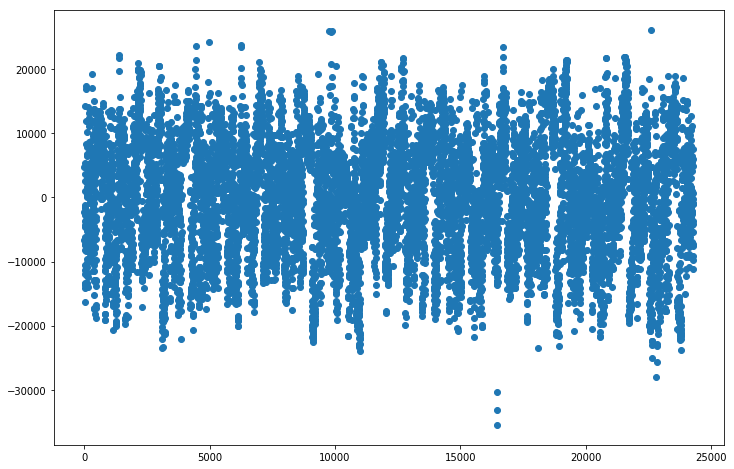

In [11]:
fit.resid.plot(style='o', figsize=(12,8));


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

So here we have an issue because wins last 10 is empty - i'll fill it in with mean for now, but i may go back and change this (or do mean by team/year)

In [15]:
df = df.fillna(df.mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12098 entries, 6 to 24292
Data columns (total 7 columns):
Attendance           12098 non-null float64
Rank                 12098 non-null int64
GB                   12098 non-null float64
is_night             12098 non-null int64
Wins_last_10         12098 non-null float64
Mean_runs_last_10    12098 non-null float64
run_differential     12098 non-null int64
dtypes: float64(4), int64(3)
memory usage: 756.1 KB


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold


cross validation below

In [22]:
lr = LinearRegression()
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [62]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm_r2s, cv_lm_ridge_r2s, cv_lm_lasso_r2s = [], [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    # linear regressions
    lm = LinearRegression()
    lm_ridge = Ridge(alpha=500)
    lm_lasso = Lasso(alpha=500)

    #simple linear regression

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling
    #turning scaling off to see how it effects
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_ridge.fit(X_train_scaled, y_train)
    cv_lm_ridge_r2s.append(lm_ridge.score(X_val_scaled, y_val))

    #lasso with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_lasso.fit(X_train_scaled, y_train)
    cv_lm_lasso_r2s.append(lm_lasso.score(X_val_scaled, y_val))
    
print('Simple regression scores: ', cv_lm_r2s, '\n')
print('Ridge scores: ', cv_lm_ridge_r2s, '\n')
print('Lasso scores: ', cv_lm_lasso_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_ridge_r2s):.3f} +- {np.std(cv_lm_ridge_r2s):.3f}')
print(f'Lasso mean cv r^2: {np.mean(cv_lm_lasso_r2s):.3f} +- {np.std(cv_lm_lasso_r2s):.3f}')


Simple regression scores:  [0.1582239991384773, 0.14700227071905003, 0.1430249206862797, 0.14343525424940995, 0.15995897076909404] 

Ridge scores:  [0.15633839839599528, 0.14563592929252867, 0.14350848020824614, 0.1423074644408786, 0.16157773393856711] 

Lasso scores:  [0.15496088999108526, 0.13963026138539625, 0.1378035981645096, 0.13892733204565122, 0.15435292701486558] 

Simple mean cv r^2: 0.150 +- 0.007
Ridge mean cv r^2: 0.150 +- 0.008
Lasso mean cv r^2: 0.145 +- 0.008


In [32]:
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# X_test_scaled = scaler.transform(X_test)

# lm_reg = Ridge(alpha=1)
# lm_reg.fit(X_scaled,y)
# print(f'Ridge Regression test R^2: {lm_reg.score(X_test_scaled, y_test):.3f}')

y_pred = lm_reg.predict(X_val_scaled)


In [42]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_val, y_pred))
# R2
print('R2 score: %.2f' % r2_score(y_val, y_pred))

Mean squared error: 82282293.47
R2 score: 0.16


/anaconda3/lib/python3.6/site-packages/mpl_toolkits/axes_grid1/axes_size.py:267: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cbook.is_numlike(size):
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/axes_grid1/axes_size.py:267: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cbook.is_numlike(size):


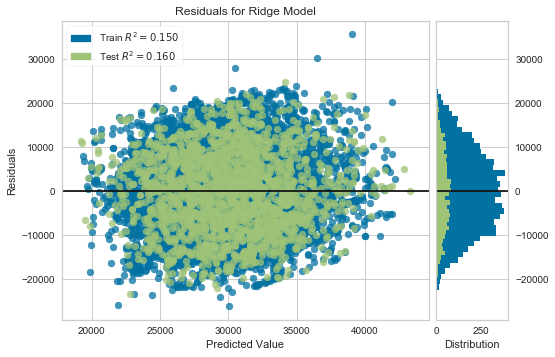

In [36]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the model
visualizer.score(X_val_scaled, y_val)  # Evaluate the model on the val data
visualizer.poof()                 # Draw/show/poof the data

In [41]:
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state = 1000)

print(np.mean(cross_val_score(lm, X, y, cv=kf, scoring='r2')))
print(np.mean(cross_val_score(lm_reg, X, y, cv=kf, scoring='r2')))

0.1515712049675092
0.1515713092122929


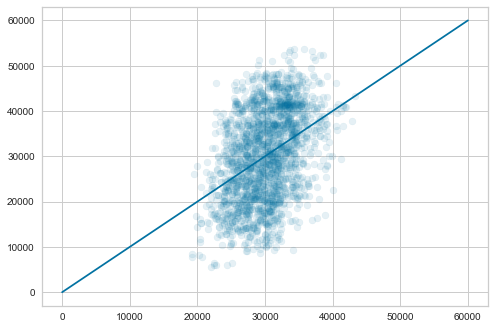

In [55]:
plt.scatter(y_pred, y_val, alpha=.1)
plt.plot(np.linspace(0,60000,1000), np.linspace(0,60000,1000))

In [63]:
with open('/Users/robertpagano/src/metis_project_luther/regression_data_v2.pickle', "rb") as to_read:
    df_v2 = pickle.load(to_read)

In [70]:
df_v2.shape

(12318, 14)

Below is my second run through the same linear models, this time with OPP data:

In [67]:
# lr2 = LinearRegression()
X2 = df_v2.iloc[:, 1:]
y2 = df_v2.iloc[:, 0]

X2, X2_test, y2, y2_test = train_test_split(X2, y2, test_size=.2, random_state=10) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
X2, y2 = np.array(X2), np.array(y2)

In [95]:
kf2 = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm_r2s_2, cv_lm_ridge_r2s_2, cv_lm_lasso_r2s_2 = [], [], [] #collect the validation results for both models


for train_ind, val_ind in kf.split(X2,y2):
    
    X_train_2, y_train_2 = X2[train_ind], y2[train_ind]
    X_val_2, y_val_2 = X2[val_ind], y2[val_ind] 
    
    # linear regressions
    lm_2 = LinearRegression()
    lm_ridge_2 = Ridge(alpha=500)
    lm_lasso_2 = Lasso(alpha=500)

    #simple linear regression

    lm_2.fit(X_train_2, y_train_2)
    cv_lm_r2s_2.append(lm_2.score(X_val_2, y_val_2))
    
    #ridge with feature scaling
    #turning scaling off to see how it effects
    scaler = StandardScaler()
    X_train_scaled_2 = scaler.fit_transform(X_train_2)
    X_val_scaled_2 = scaler.transform(X_val_2)
    
    lm_ridge_2.fit(X_train_scaled_2, y_train_2)
    cv_lm_ridge_r2s_2.append(lm_ridge_2.score(X_val_scaled_2, y_val_2))

    #lasso with feature scaling
    scaler = StandardScaler()
    X_train_scaled_2 = scaler.fit_transform(X_train_2)
    X_val_scaled_2 = scaler.transform(X_val_2)
    
    lm_lasso_2.fit(X_train_scaled_2, y_train_2)
    cv_lm_lasso_r2s_2.append(lm_lasso_2.score(X_val_scaled_2, y_val_2))
    
print('Simple regression scores: ', cv_lm_r2s_2, '\n')
print('Ridge scores: ', cv_lm_ridge_r2s_2, '\n')
print('Lasso scores: ', cv_lm_lasso_r2s_2, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s_2):.3f} +- {np.std(cv_lm_r2s_2):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_ridge_r2s_2):.3f} +- {np.std(cv_lm_ridge_r2s_2):.3f}')
print(f'Lasso mean cv r^2: {np.mean(cv_lm_lasso_r2s_2):.3f} +- {np.std(cv_lm_lasso_r2s_2):.3f}')

Simple regression scores:  [0.15580938184652615, 0.1363819846957457, 0.1457271390456416, 0.16448602654618283, 0.15021344740923315] 

Ridge scores:  [0.1542069091511774, 0.13499602592576065, 0.14487591551036394, 0.16663311296193495, 0.1486782115309967] 

Lasso scores:  [0.13967490943612604, 0.12245389776335915, 0.13585945354541973, 0.15031609860530748, 0.14294455677288231] 

Simple mean cv r^2: 0.151 +- 0.009
Ridge mean cv r^2: 0.150 +- 0.010
Lasso mean cv r^2: 0.138 +- 0.009


## So adding the OPP features so far, my R^2 values stayed mostly the same. Ridge and Lasso seem to be lowering the R^2 as well, the higher the lambda is tuned ##

In [96]:
print(list(zip(df_v2.iloc[:, 1:], lm_2.coef_)))
print(list(zip(df_v2.iloc[:, 1:], lm_ridge_2.coef_)))
print(list(zip(df_v2.iloc[:, 1:], lm_lasso_2.coef_)))


[('Gm#', 7.669058989068918), ('Rank', -883.1496886047743), ('GB', 99.04285303037571), ('is_night', -2681.1424054992917), ('run_differential', 17.77211976702802), ('Win_differential', 159.53995626582756), ('Wins_last_10', 67.79694700518819), ('Mean_runs_last_10', 13.046580843898916), ('Opp_Wins_last_10', 125.54215456973179), ('Opp_Win_differential', 3.067647646073358), ('Opp_Rank', -104.51424036424302), ('Opp_GB', -85.84438176143702), ('Opp_Mean_runs_last_10', -342.33157402814714)]
[('Gm#', 428.963150416761), ('Rank', -1171.4601932655646), ('GB', 322.5410040739096), ('is_night', -1178.890697732531), ('run_differential', 1235.5628895296013), ('Win_differential', 1590.2974441087872), ('Wins_last_10', 166.52974945542655), ('Mean_runs_last_10', 14.923414015238912), ('Opp_Wins_last_10', 168.90436009612216), ('Opp_Win_differential', 271.20286327106896), ('Opp_Rank', -166.3798058093944), ('Opp_GB', -496.0794498116845), ('Opp_Mean_runs_last_10', -355.0735824460304)]
[('Gm#', 0.0), ('Rank', -819